# Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os 
dirs= os.listdir("/content/drive/My Drive/GUIST_Webinar_Files/Jupyter_Notebook_Codes")
print(dirs)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
['diabetes.csv', 'ds_life_cycle.jpeg', 'data.csv', 'python-ml-breast-cancer-diagnostic-data-set.ipynb', 'mnist.npz', 'h.png', 'intro-to-keras-with-breast-cancer-data-ann.ipynb', 'Complete_ML_Tutorial.ipynb', 'Kmeans.ipynb', 'Handwritten_Digit_Recognizer_Keras_CNN.ipynb', '.DS_Store', '.ipynb_checkpoints']


The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.

Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.

Each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

## Loading the MNIST dataset in Keras

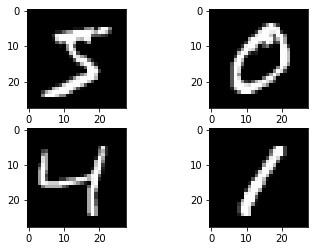

In [3]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## Baseline Model with Multi-Layer Perceptrons

Do we really need a complex model like a convolutional neural network to get the best results with MNIST?

You can get very good results using a very simple neural network model with a single hidden layer. In this section we will create a simple multi-layer perceptron model that achieves an error rate of 1.74%. We will use this as a baseline for comparing more complex convolutional neural network models.

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.2800 - acc: 0.9206 - val_loss: 0.1420 - val_acc: 0.9573
Epoch 2/10
 - 3s - loss: 0.1118 - acc: 0.9676 - val_loss: 0.0922 - val_acc: 0.9704
Epoch 3/10
 - 3s - loss: 0.0717 - acc: 0.9796 - val_loss: 0.0790 - val_acc: 0.9772
Epoch 4/10
 - 3s - loss: 0.0504 - acc: 0.9858 - val_loss: 0.0747 - val_acc: 0.9765
Epoch 5/10
 - 3s - loss: 0.0373 - acc: 0.9888 - val_loss: 0.0680 - val_acc: 0.9791
Epoch 6/10
 - 3s - loss: 0.0269 - acc: 0.9929 - val_loss: 0.0620 - val_acc: 0.9805
Epoch 7/10
 - 3s - loss: 0.0207 - acc: 0.9947 - val_loss: 0.0612 - val_acc: 0.9811
Epoch 8/10
 - 3s - loss: 0.0138 - acc: 0.9969 - val_loss: 0.0619 - val_acc: 0.9803
Epoch 9/10
 - 3s - loss: 0.0108 - acc: 0.9978 - val_loss: 0.0580 - val_acc: 0.9815
Epoch 10/10
 - 3s - loss: 0.0083 - acc: 0.9984 - val_loss: 0.0597 - val_acc: 0.9815
Baseline Error: 1.85%


## Simple Convolutional Neural Network for MNIST

Now that we have seen how to load the MNIST dataset and train a simple multi-layer perceptron model on it, it is time to develop a more sophisticated convolutional neural network or CNN model.

In this section we will create a simple CNN for MNIST that demonstrates how to use all of the aspects of a modern CNN implementation, including Convolutional layers, Pooling layers and Dropout layers.

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Next we need to load the MNIST dataset and reshape it so that it is suitable for use training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height].

In the case of RGB, the first dimension pixels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. In the case of MNIST where the pixel values are gray scale, the pixel dimension is set to 1.

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Convolutional neural networks are more complex than standard multi-layer perceptrons, so we will start by using a simple structure to begin with that uses all of the elements for state of the art results. Below summarizes the network architecture.

1. The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5×5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above [pixels][width][height].
2. Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.
3. The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
4. Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
5. Next a fully connected layer with 128 neurons and rectifier activation function.
6. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

In [ ]:
def simple_cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Larger Convolutional Neural Network for MNIST


In [ ]:
def larger_cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# build the model
model = simple_cnn_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 54s - loss: 0.2238 - acc: 0.9366 - val_loss: 0.0792 - val_acc: 0.9749
Epoch 2/10
 - 53s - loss: 0.0715 - acc: 0.9785 - val_loss: 0.0459 - val_acc: 0.9841
Epoch 3/10
 - 57s - loss: 0.0512 - acc: 0.9842 - val_loss: 0.0436 - val_acc: 0.9857
Epoch 4/10
 - 63s - loss: 0.0393 - acc: 0.9877 - val_loss: 0.0412 - val_acc: 0.9873
Epoch 5/10
 - 62s - loss: 0.0328 - acc: 0.9895 - val_loss: 0.0348 - val_acc: 0.9885
Epoch 6/10
 - 61s - loss: 0.0266 - acc: 0.9915 - val_loss: 0.0325 - val_acc: 0.9893
Epoch 7/10
 - 61s - loss: 0.0221 - acc: 0.9931 - val_loss: 0.0349 - val_acc: 0.9879
Epoch 8/10
 - 59s - loss: 0.0189 - acc: 0.9941 - val_loss: 0.0323 - val_acc: 0.9883
Epoch 9/10
 - 60s - loss: 0.0154 - acc: 0.9949 - val_loss: 0.0316 - val_acc: 0.9896
Epoch 10/10
 - 61s - loss: 0.0142 - acc: 0.9959 - val_loss: 0.0321 - val_acc: 0.9889
CNN Error: 1.11%


In [ ]:
# build the model
model = larger_cnn_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 57s - loss: 0.3697 - acc: 0.8876 - val_loss: 0.0901 - val_acc: 0.9706
Epoch 2/10
 - 58s - loss: 0.1026 - acc: 0.9688 - val_loss: 0.0586 - val_acc: 0.9821
Epoch 3/10
 - 53s - loss: 0.0739 - acc: 0.9774 - val_loss: 0.0457 - val_acc: 0.9847
Epoch 4/10
 - 56s - loss: 0.0594 - acc: 0.9816 - val_loss: 0.0394 - val_acc: 0.9864
Epoch 5/10
 - 58s - loss: 0.0531 - acc: 0.9834 - val_loss: 0.0321 - val_acc: 0.9889
Epoch 6/10
 - 58s - loss: 0.0480 - acc: 0.9849 - val_loss: 0.0291 - val_acc: 0.9894
Epoch 7/10
 - 58s - loss: 0.0411 - acc: 0.9868 - val_loss: 0.0304 - val_acc: 0.9894
Epoch 8/10
 - 58s - loss: 0.0381 - acc: 0.9879 - val_loss: 0.0276 - val_acc: 0.9897
Epoch 9/10
 - 58s - loss: 0.0342 - acc: 0.9893 - val_loss: 0.0299 - val_acc: 0.9893
Epoch 10/10
 - 58s - loss: 0.0317 - acc: 0.9904 - val_loss: 0.0282 - val_acc: 0.9909
CNN Error: 0.91%
